# Understanding Digital Filters

## ButterWorth Filter

In [3]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

In [2]:
# explicit function to convert
# edge frequencies
def convertX(f_sample, f):
	w = []
	
	for i in range(len(f)):
		b = 2*((f[i]/2)/(f_sample/2))
		w.append(b)

	omega_mine = []

	for i in range(len(w)):
		c = (2/Td)*np.tan(w[i]/2)
		omega_mine.append(c)

	return omega_mine



In [4]:
# Specifications of Filter

# sampling frequency
f_sample = 7000

# pass band frequency
f_pass = [1400, 2100]

# stop band frequency
f_stop = [1050, 2450]

# pass band ripple
fs = 0.5

# Sampling Time
Td = 1

# pass band ripple
g_pass = 0.4

# stop band attenuation
g_stop = 50

In [5]:
# Conversion to prewrapped analog
# frequency
omega_p=convertX(f_sample,f_pass)
omega_s=convertX(f_sample,f_stop)
	
# Design of Filter using signal.buttord
# function
N, Wn = signal.buttord(omega_p, omega_s,
					g_pass, g_stop,
					analog=True)
	
	
# Printing the values of order & cut-off frequency
# N is the order
print("Order of the Filter=", N)

# Wn is the cut-off freq of the filter
print("Cut-off frequency= {:} rad/s ".format(Wn))
	
	
# Conversion in Z-domain
	
# b is the numerator of the filter & a is
# the denominator
b, a = signal.butter(N, Wn, 'bandpass', True)
z, p = signal.bilinear(b, a, fs)

# w is the freq in z-domain & h is the
# magnitude in z-domain
w, h = signal.freqz(z, p, 512)

Order of the Filter= 12
Cut-off frequency= [0.39689099 0.63196761] rad/s 


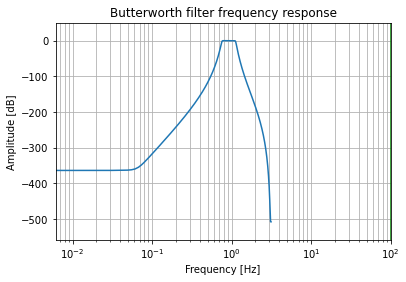

In [13]:
# Magnitude Response
plt.semilogx(w, 20*np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')
plt.show()



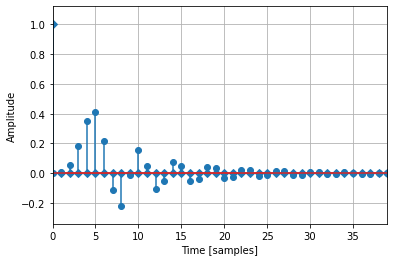

In [6]:
# Impulse Response
imp = signal.unit_impulse(40)
c, d = signal.butter(N, 0.5)
response = signal.lfilter(c, d, imp)

plt.stem(np.arange(0, 40), imp, markerfmt='D', use_line_collection=True)
plt.stem(np.arange(0, 40), response, use_line_collection=True)
plt.margins(0, 0.1)

plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [17]:
help(signal.unit_impulse)

Help on function unit_impulse in module scipy.signal._waveforms:

unit_impulse(shape, idx=None, dtype=<class 'float'>)
    Unit impulse signal (discrete delta function) or unit basis vector.
    
    Parameters
    ----------
    shape : int or tuple of int
        Number of samples in the output (1-D), or a tuple that represents the
        shape of the output (N-D).
    idx : None or int or tuple of int or 'mid', optional
        Index at which the value is 1.  If None, defaults to the 0th element.
        If ``idx='mid'``, the impulse will be centered at ``shape // 2`` in
        all dimensions.  If an int, the impulse will be at `idx` in all
        dimensions.
    dtype : data-type, optional
        The desired data-type for the array, e.g., ``numpy.int8``.  Default is
        ``numpy.float64``.
    
    Returns
    -------
    y : ndarray
        Output array containing an impulse signal.
    
    Notes
    -----
    The 1D case is also known as the Kronecker delta.
    
    .. v

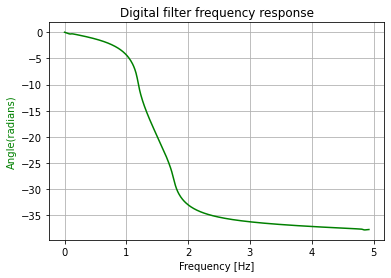

In [14]:
# Frequency Response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.set_ylabel('Angle(radians)', color='g')
ax1.set_xlabel('Frequency [Hz]')

angles = np.unwrap(np.angle(h))

ax1.plot(w/2*np.pi, angles, 'g')
ax1.grid()
ax1.axis('tight')
plt.show()